# 1.1 목표

- 와인 숙성을 분석 후 품질 등급 예측하기

# 1.2 데이터 수집

-  오픈데이터 활용 :UCI ML Data 저장소 (http://archive.ics.uci.edu/ml/machine-learning-databases/winequality/)

## 1.2.1 열구분자를 세미콜론(;)으로 인식시키기

In [1]:
import pandas as pd

# 데이터 분석 때 소수 넷째자리까지 표기 옵션
pd.set_option("display.precision", 4)

In [2]:
red_df=pd.read_csv('winequality-red.csv',sep=';',header=0,engine='python')
white_df=pd.read_csv('winequality-white.csv',sep=';',header=0,engine='python')

red_df.to_csv('winequality-red2.csv', index=False)
white_df.to_csv('winequality-white2.csv', index=False)

## 1.2.2 데이터 병합

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_df.insert(0, column='type', value='red')

In [5]:
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red_df.shape

(1599, 13)

In [7]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
white_df.insert(0, column='type', value='white')

In [9]:
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
white_df.shape

(4898, 13)

In [11]:
wine=pd.concat([red_df, white_df])

In [12]:
wine.shape

(6497, 13)

In [13]:
wine.to_csv('wine.csv', index=False)

# 1.3 데이터 분석

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [15]:
#  column에 공백이 있으면 _로 채우기
wine.columns=wine.columns.str.replace(' ', '_')

In [16]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.0000,6497.0000,6497.0000,6497.0000,6497.000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000,6497.0000
mean,7.2153,0.3397,0.3186,5.4432,0.056,30.5253,115.7446,0.9947,3.2185,0.5313,10.4918,5.8184
std,1.2964,0.1646,0.1453,4.7578,0.035,17.7494,56.5219,0.0030,0.1608,0.1488,1.1927,0.8733
min,3.8000,0.0800,0.0000,0.6000,0.009,1.0000,6.0000,0.9871,2.7200,0.2200,8.0000,3.0000
25%,6.4000,0.2300,0.2500,1.8000,0.038,17.0000,77.0000,0.9923,3.1100,0.4300,9.5000,5.0000
50%,7.0000,0.2900,0.3100,3.0000,0.047,29.0000,118.0000,0.9949,3.2100,0.5100,10.3000,6.0000
75%,7.7000,0.4000,0.3900,8.1000,0.065,41.0000,156.0000,0.9970,3.3200,0.6000,11.3000,6.0000
max,15.9000,1.5800,1.6600,65.8000,0.611,289.0000,440.0000,1.0390,4.0100,2.0000,14.9000,9.0000


In [18]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [19]:
wine.quality.value_counts() # 9등급이 제일 좋은 와인

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# 1.4 데이터 모델링

## 1.4.1 descirbe() 함수로 group 비교

In [20]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.6360,0.8076,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.8779,0.8856,3.0,5.0,6.0,6.0,9.0


In [21]:
# 평균
wine.groupby('type')['quality'].mean()

type
red      5.6360
white    5.8779
Name: quality, dtype: float64

In [22]:
# 표준편차
wine.groupby('type')['quality'].std()

type
red      0.8076
white    0.8856
Name: quality, dtype: float64

In [23]:
# agg() 함수를 사용하여 평균과 표준편차 묶어서 표현
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.6360,0.8076
white,5.8779,0.8856


## 1.4.2 t-검정과 회귀 분석으로 group 비교

In [24]:
!pip install statsmodels

In [25]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [26]:
red_wine_quality=wine.loc[wine['type']=='red','quality']
white_wine_quality=wine.loc[wine['type']=='white','quality']

In [27]:
# stats.ttest_ind() 함수를 이용하여 t-검정을 하고 두 그룹 간의 차이 확인
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var=False)

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [28]:
# 종속변수 ~ 독립변수1 + 독립변수2 ......
Rformula='quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [29]:
regression_result=ols(Rformula, data=wine).fit()  # OLS(Ordinary Least Squares) 모델 사용

In [30]:
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        20:54:11   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1.4.3 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

In [31]:
# 회귀 분석 모델에서 사용할 독립변수 추출, quality, type제외
sample1=wine[wine.columns.difference(['qulity', 'type'])]

In [32]:
# 0~4까지의 5개의 샘플만 추출
sample1=sample1[0:5][:]

In [33]:
# 회귀 분석 모델 적용하여 예측값 sample1_predict에 저장
sample1_predict=regression_result.predict(sample1)

In [34]:
sample1_predict # 5의 근사치이기 때문에 예측이 잘됨

0    4.9976
1    4.9250
2    5.0347
3    5.6803
4    4.9976
dtype: float64

In [35]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [36]:
data={"fixed_acidity":[8.5,8.1],"volatile_acidity":[0.8,0.5],"citric_acid":[0.3,0.4],"residual_sugar":[6.1,5.8],"chlorides":[0.055,0.04],
      "free_sulfur_dioxide":[30.0,31.0],"total_sulfur_dioxide":[98.0,99],"density":[0.996,0.91],"pH":[3.25,3.01],"sulphates":[0.4,0.35],
      "alcohol":[9.0,0.88]}

In [37]:
sample2=pd.DataFrame(data, columns=sample1.columns)

In [38]:
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,NaN,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,NaN,5.8,0.35,99.0,0.5


In [39]:
sample2_predict=regression_result.predict(sample2)

In [40]:
sample2_predict

0    4.8091
1    7.5821
dtype: float64

# 1.5 시각화

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
sns.set_style('dark')

## 1.5.1 히스토그램 그리기

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

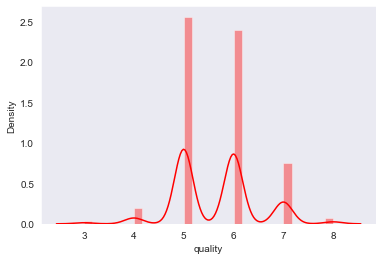

In [43]:
sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

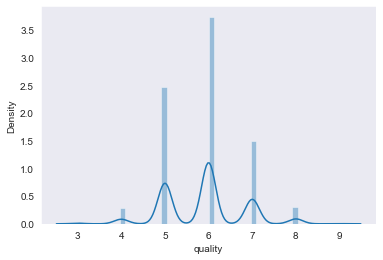

In [44]:
sns.distplot(white_wine_quality, kde=True, label='white wine')

Text(0.5, 1.0, 'Quality of Wine Type')

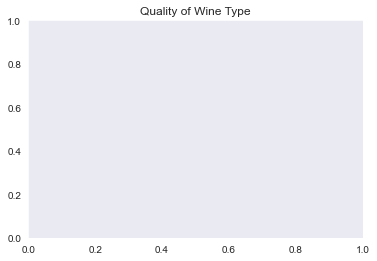

In [45]:
plt.title("Quality of Wine Type")

No handles with labels found to put in legend.


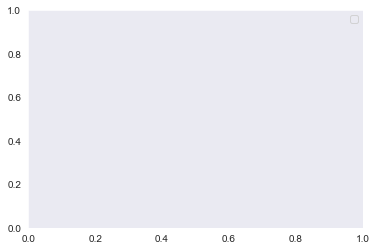

In [46]:
plt.legend()

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


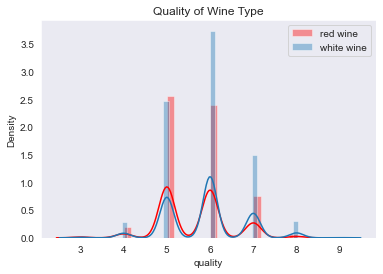

In [47]:
sns.distplot(red_wine_quality, kde=True, color='red', label='red wine')
sns.distplot(white_wine_quality, kde=True, label='white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

## 1.5.2 플롯으로 시각화

In [48]:
import statsmodels.api as sm
others=list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

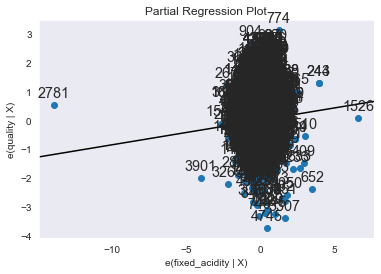

In [49]:
p, resids=sm.graphics.plot_partregress("quality", "fixed_acidity", others, data=wine, ret_coords=True)

In [50]:
fig=plt.figure(figsize=(8, 13))

<Figure size 576x936 with 0 Axes>

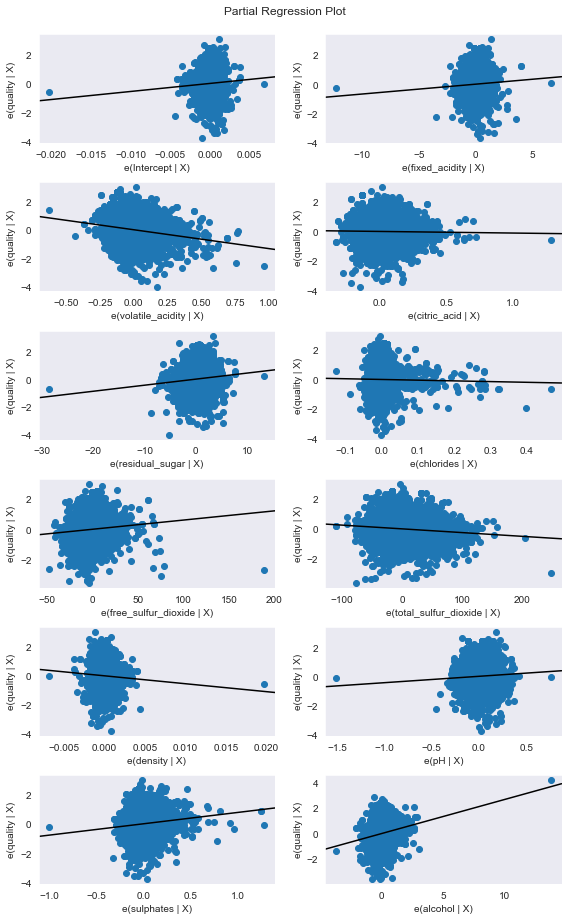

In [51]:
sm.graphics.plot_partregress_grid(regression_result, fig=fig)